In [15]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [81]:
file_name = r'Z:\All_Staff\home\lan\Analysis\2P\220310_i1369\220310_i1369_runs-002\data_dfof.mat'.replace('\\', '/')
t = sio.loadmat(file_name)
print(t.keys())
data_dfof_max_gauss = t['data_dfof_max_gauss']
data_dfof_max_gauss.shape

dict_keys(['__header__', '__version__', '__globals__', 'data_dfof', 'data_dfof_max_gauss'])


(264, 796)

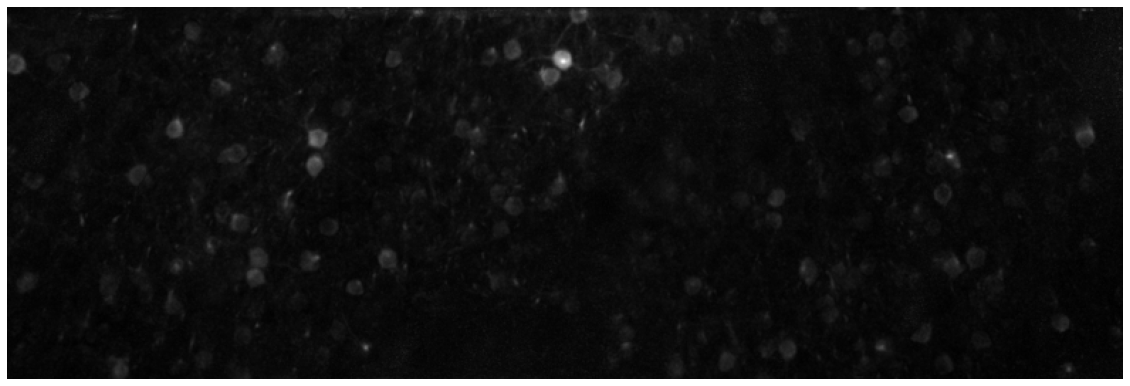

In [82]:
# max_proj = np.max(data_dfof, axis=2)
# percentile_95 = np.percentile(data_dfof, 95, axis=2)

edge_row = 1
edge_col = 5
data_no_edge = data_dfof_max_gauss[edge_row:-edge_row, edge_col:-edge_col]

plt.figure(figsize=(20, 10))
plt.imshow(data_no_edge, cmap='gray')
plt.axis('off');
plt.savefig("dfof_max_gauss.png", bbox_inches='tight', pad_inches=0) # stim resp max, gauss filtering 

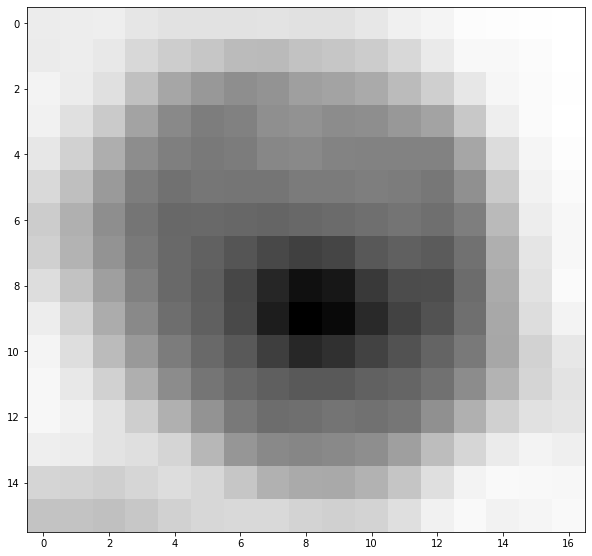

In [89]:
plt.figure(figsize=(10, 10))
plt.imshow(data_no_edge[29:45,383:400], cmap='binary') # cell diameter = 15 pixels

In [88]:
# load npy from cellpose segmentation mask
tt = np.load('test_seg.npy', allow_pickle=True).item()
tt.keys()

dict_keys(['outlines', 'colors', 'masks', 'chan_choose', 'img', 'ismanual', 'X2', 'filename', 'flows'])